In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('house price.csv')

In [2]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3990000,3960,3,1,2,yes,no,no,no,no,0,no,furnished
1,3990000,4050,2,1,2,yes,yes,yes,no,no,0,yes,unfurnished
2,3920000,7260,3,2,1,yes,yes,yes,no,no,3,no,furnished
3,3920000,5500,4,1,2,yes,yes,yes,no,no,0,no,semi-furnished
4,3920000,3000,3,1,2,yes,no,no,no,no,0,no,semi-furnished
5,3920000,3290,2,1,1,yes,no,no,yes,no,1,no,furnished
6,3920000,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
7,3920000,8080,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
8,3920000,2145,4,2,1,yes,no,yes,no,no,0,yes,unfurnished
9,3885000,3780,2,1,2,yes,yes,yes,no,no,0,no,semi-furnished


In [3]:
df.shape

(216, 13)

In [4]:
df.info

<bound method DataFrame.info of        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    3990000  3960         3          1        2      yes        no       no   
1    3990000  4050         2          1        2      yes       yes      yes   
2    3920000  7260         3          2        1      yes       yes      yes   
3    3920000  5500         4          1        2      yes       yes      yes   
4    3920000  3000         3          1        2      yes        no       no   
..       ...   ...       ...        ...      ...      ...       ...      ...   
211  1820000  3000         2          1        1      yes        no      yes   
212  1767150  2400         3          1        1       no        no       no   
213  1750000  3620         2          1        1      yes        no       no   
214  1750000  2910         3          1        1       no        no       no   
215  1750000  3850         3          1        2      yes        no       no   

    hot

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,2.160000e+02,216.000000,216.000000,216.000000,216.000000,216.000000
mean,3.156951e+06,3994.500000,2.666667,1.083333,1.467593,0.384259
std,5.460305e+05,1545.849356,0.753287,0.293337,0.553102,0.699191
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,2.835000e+06,3097.500000,2.000000,1.000000,1.000000,0.000000
50%,3.290000e+06,3630.000000,3.000000,1.000000,1.000000,0.000000
75%,3.570000e+06,4400.000000,3.000000,1.000000,2.000000,1.000000
max,3.990000e+06,12944.000000,6.000000,3.000000,3.000000,3.000000


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [8]:
from sklearn.preprocessing import LabelEncoder
categ = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3990000,3960,3,1,2,1,0,0,0,0,0,0,0
1,3990000,4050,2,1,2,1,1,1,0,0,0,1,2
2,3920000,7260,3,2,1,1,1,1,0,0,3,0,0
3,3920000,5500,4,1,2,1,1,1,0,0,0,0,1
4,3920000,3000,3,1,2,1,0,0,0,0,0,0,1


<Axes: >

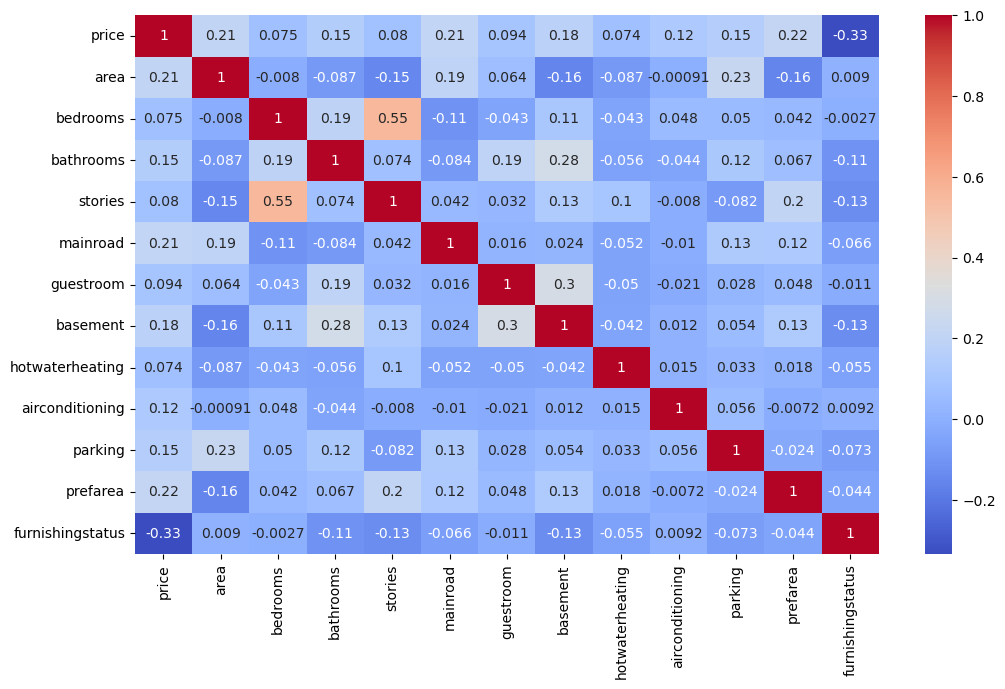

In [10]:
# CORRELATION BETWEEN THE COLUMNS

corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [11]:
X = df.drop(['price'],axis=1)
y = df['price']

In [13]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3960,3,1,2,1,0,0,0,0,0,0,0
1,4050,2,1,2,1,1,1,0,0,0,1,2
2,7260,3,2,1,1,1,1,0,0,3,0,0
3,5500,4,1,2,1,1,1,0,0,0,0,1
4,3000,3,1,2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
211,3000,2,1,1,1,0,1,0,0,2,0,2
212,2400,3,1,1,0,0,0,0,0,0,0,1
213,3620,2,1,1,1,0,0,0,0,0,0,2
214,2910,3,1,1,0,0,0,0,0,0,0,0


In [14]:
y

0      3990000
1      3990000
2      3920000
3      3920000
4      3920000
        ...   
211    1820000
212    1767150
213    1750000
214    1750000
215    1750000
Name: price, Length: 216, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
len(X_train),len(X_test)

(151, 65)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# FITTING THE DATA INTO THE MODEL
model.fit(X_train,y_train)

LinearRegression()

In [19]:
y_predict = model.predict(X_test)
y_predict

array([3097730.88376621, 2853501.42925036, 3127290.3223917 ,
       2613122.90565593, 3052700.20726829, 3090951.08067465,
       2660846.43841846, 3053997.38046329, 2852251.38273613,
       2962654.45926779, 3053636.74683641, 2924859.34946892,
       2967946.07114327, 3337994.38067179, 3083431.79653716,
       3152966.50910927, 2594310.17142302, 2859531.16402317,
       3327980.03581597, 3002383.09364841, 3029033.14428643,
       2895017.1730874 , 2887213.13786138, 3684509.62720755,
       2945599.80294139, 2983504.75225378, 3366220.99642622,
       3444176.51547221, 3438290.59994138, 2683390.35303199,
       3127129.60113505, 3111768.43729824, 2950020.48713696,
       2677441.29708486, 2853981.19579198, 2880648.31469627,
       2819648.59164166, 3711942.95349254, 3026181.17526742,
       3634503.79122408, 3453144.61149594, 2952681.93781678,
       3276178.19152441, 2920752.65436773, 3492559.98290862,
       3020677.95709435, 2837868.72343199, 3079143.68669175,
       3914850.10228016,

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
score

0.14150752252458598